In [1]:
from utils.initialisation import DenseLayer
from utils.feed import feed_forward, back_prop
from utils.loss import  get_loss
from utils.activation import get_activation
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
x_tot = np.random.rand(1000,10)
y_tot = np.random.rand(1000,1)
y_tot = (y_tot > 0.4)*1

x_train = x_tot[:800,:]
y_train = y_tot[:800,:]

x_test = x_tot[800:,:]
y_test = y_tot[800:,:]
 

In [12]:
x = x_train
y = y_train

w1,b1 = DenseLayer(10,5)
w2,b2 = DenseLayer(5)

for _ in tqdm(range(1000000)):
    z1,a1=feed_forward(x,w1,b1,'relu')
    z2,a2=feed_forward(a1,w2,b2,'sigmoid')
    da_next = (a2-y)
    dw2, db2, da_next = back_prop(a1,w2, z2,da_next,'sigmoid')
    dw1, db1, da1 = back_prop(x,w1, z1,da_next,'relu')
    w1 -= 0.01*dw1
    w2 -= 0.01*dw2
    b1 -= 0.01*db1
    b2 -= 0.01*db2

 64%|██████▍   | 641507/1000000 [04:47<03:26, 1732.20it/s]

In [ ]:
z1,a1=feed_forward(x_test,w1,b1,'relu')
z2,yp=feed_forward(a1,w2,b2,'sigmoid')


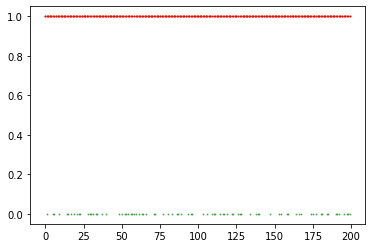

In [ ]:
plt.scatter(range(x_test.shape[0]), y_test, c = 'green', alpha=0.5,s=1)
plt.scatter(range(x_test.shape[0]), yp, c = 'red',s=1)
plt.show()

In [ ]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b


def model_optimize(w, b, X, Y, loss='msme', activation = 'sigmoid'):
    m = X.shape[0]
    
    yp = np.dot(w,X.T)+b
    yt = Y.T

    if activation is not None:
        yp = get_activation(activation)(yp)
        
    
    cost = get_loss(loss)(yt,yp)

    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (yp-yt).T))
    db = (1/m)*(np.sum(yp-yt))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred